# Ensemble Model

In [1]:
#importing required libraries
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

In [2]:
# read titanic dataset
titan=pd.read_csv("train.csv")
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# let's see what are the types of variables titanic dataset is having
titan.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# let's check shape of the data how many rows and columns are having titanic dataset
titan.shape

(891, 12)

In [5]:
# total size of the dataset
titan.size

10692

In [6]:
# let's have a statistic summary of titanic data
titan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


                 Members  percent
Pclass Survived                  
1      1             136     63.0
       0              80     37.0
2      0              97     53.0
       1              87     47.0
3      0             372     76.0
       1             119     24.0


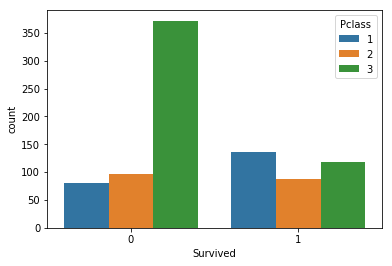

In [7]:
# To the what percentage of the people were Survived based on the Pclass
sns.countplot(x='Survived', hue='Pclass', data=titan)
print(pd.DataFrame({"Members":titan.groupby("Pclass").Survived.value_counts(),
                    "percent":round(titan.groupby("Pclass").Survived.value_counts(normalize=True),2)*100}))

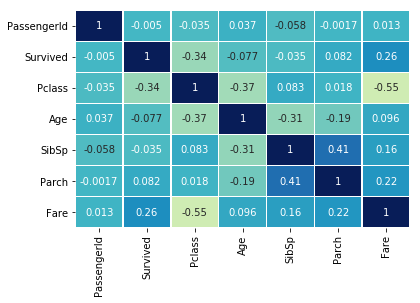

In [8]:
# check correlation in the form of heatmap
sns.heatmap(titan.corr(),annot=True, linewidths=.5,center=0,cbar=False,cmap="YlGnBu")

In [9]:
# treating missing values
# if the data is in the bell curve we can use the Mean value
# if the data is skewed/ having high Standard Deviation then use Median or Mode value
befor=titan.Age.agg(["mean","median","std"])
print(befor)
print("---------")
after=titan["Age"].fillna(titan["Age"].median())
print(after.agg(["mean","median","std"]))

mean      29.699118
median    28.000000
std       14.526497
Name: Age, dtype: float64
---------
mean      29.361582
median    28.000000
std       13.019697
Name: Age, dtype: float64


C:\Users\Shukur SK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


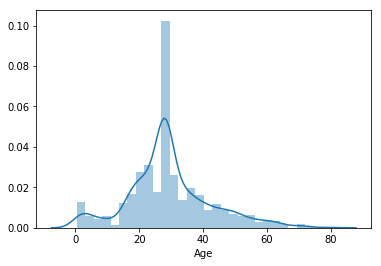

In [10]:
# there is no much deviation in Age variable after filling NA values with median so we are taking median for NA.
titan["Age"]=titan["Age"].fillna(titan["Age"].median())# filling NA values with median because there is no much variation
titan["Age"].astype('int64').dtypes # converting data type for visualization (float or NA values distplot will not take)
sns.distplot(titan["Age"])

In [11]:
# creating One Hot Coding or Dummy variable
pcl=pd.get_dummies(titan['Pclass'],drop_first=True)
sex=pd.get_dummies(titan['Sex'],drop_first=True)
embark=pd.get_dummies(titan['Embarked'],drop_first=True)
titan=pd.concat([titan,pcl,sex,embark], axis=1)

In [12]:
# eleminating(droping) unnecessary variables
titan.drop(['PassengerId','Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1, inplace=True)
titan.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [13]:
x=titan.drop('Survived', axis=1)
y=titan['Survived']

In [14]:
X_train,x_test,Y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=10)

In [15]:
X_train.shape,Y_train.shape

((623, 9), (623,))

# Create the decision tree model using "entropy" method of finding the split columns and fit it to training data.

In [16]:
# create a Decision Tree Classifier model
model_entropy=DecisionTreeClassifier(criterion="entropy")

In [17]:
# fit the model to the training set
model_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
# check trained model score
model_entropy.score(X_train,Y_train)

0.9839486356340289

In [19]:
# check test data score
model_entropy.score(x_test,y_test)

0.7761194029850746

In [20]:
# see confusion_matrix
prd=model_entropy.predict(x_test)
confusion_matrix(y_test,prd)

array([[140,  34],
       [ 26,  68]], dtype=int64)

In [21]:
# try to play with differant parameters in the classification model which you have created
# for better result i am using "max_depth" here
# max_depth means the depth of decision tree (no.of Splits in a variable)
# entropy is for the Information Gain.
pruned=DecisionTreeClassifier(criterion="entropy",max_depth=4)
pruned.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
# let's see Train score and Test score
print(pruned.score(X_train,Y_train))
print(pruned.score(x_test,y_test))

0.8282504012841091
0.8507462686567164


after Decision Tree parameter tuning We got better score result compared with first one

In [23]:
# see confusion_matrix after parameter tuning
p=pruned.predict(x_test)
confusion_matrix(y_test,p)

array([[165,   9],
       [ 31,  63]], dtype=int64)

In [24]:
# Decision Tree accuracy_score
dt=accuracy_score(y_test,p)
dt

0.8507462686567164

In [25]:
# calculating feature importance
feature_cols=x.columns
feat_imp=pruned.tree_.compute_feature_importances(normalize=False)

feat_imp_dict=dict(zip(feature_cols,pruned.feature_importances_))
f_imp=pd.DataFrame.from_dict(feat_imp_dict,orient="index")
f_imp.sort_values(by=0,ascending=False)

,0
male,0.514739
3,0.154373
Age,0.140562
Fare,0.133967
SibSp,0.028220
S,0.019798
Parch,0.008342
2,0.000000
Q,0.000000


From the feature importance dataframe we can infer that Sex,Pclass,Age and Fare are the variables that impact Survived variable

In [26]:
# Store the accuracy result for each model in a dataframe for final comparison
result=pd.DataFrame({"Method":["Decision Tree"],"Accuracy":dt})
result

,Method,Accuracy
0,Decision Tree,0.850746


# Apply the Random forest model and print the accuracy of Random forest model

In [107]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=10)
rfcl.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [108]:
prd_RF=rfcl.predict(x_test)
acc_RF=accuracy_score(y_test,prd_RF)

In [110]:
tempResults=pd.DataFrame({"Method":["Random Forest"],"Accuracy":acc_RF})
result=pd.concat([result,tempResults])
result

,Method,Accuracy
0,Decision Tree,0.850746
0,Random Forest,0.820896


# Apply Adaboost Ensemble Algorithm for the same data and print the accuracy

In [112]:
from sklearn.ensemble import AdaBoostClassifier
abcl=AdaBoostClassifier(n_estimators=15,learning_rate=0.1,random_state=20)
abcl=abcl.fit(X_train,Y_train)

In [113]:
prd_AB=abcl.predict(x_test)
acc_AB=accuracy_score(y_test,prd_AB)

In [114]:
tempResults=pd.DataFrame({"Method":["Adaboost"],"Accuracy":acc_AB})
result=pd.concat([result,tempResults])
result

,Method,Accuracy
0,Decision Tree,0.850746
0,Random Forest,0.820896
0,Adaboost,0.805970


# Apply Bagging Classigier Algorithm and Pring accuracy

In [116]:
from sklearn.ensemble import BaggingClassifier

bgcl=BaggingClassifier(n_estimators=10, max_samples=.7,bootstrap=True,oob_score=True,random_state=10)
bgcl=bgcl.fit(X_train,Y_train)

In [117]:
prd_BG=bgcl.predict(x_test)
acc_BG=accuracy_score(y_test,prd_BG)

In [118]:
tempResults=pd.DataFrame({"Method":["Bagging"],"Accuracy":acc_BG})
result=pd.concat([result,tempResults])
result

,Method,Accuracy
0,Decision Tree,0.850746
0,Random Forest,0.820896
0,Adaboost,0.805970
0,Bagging,0.813433


In [120]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl=GradientBoostingClassifier(n_estimators=10,learning_rate=0.1 ,random_state=10)
gbcl=gbcl.fit(X_train,Y_train)

In [124]:
prd_GB=gbcl.predict(x_test)
acc_GB=accuracy_score(y_test,prd_GB)

In [125]:
tempResults=pd.DataFrame({"Method":["Gradient Boost"],"Accuracy":acc_GB})
result=pd.concat([result,tempResults])
result

,Method,Accuracy
0,Decision Tree,0.850746
0,Random Forest,0.820896
0,Adaboost,0.805970
0,Bagging,0.813433
0,Gradient Boost,0.828358


After all itterations with ensemble models Decision Tree has given better result compared with other models.
so Decision Tree model will be used for Titanic Test Data

let's take a test data for prediction

In [72]:
test=pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

C:\Users\Shukur SK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


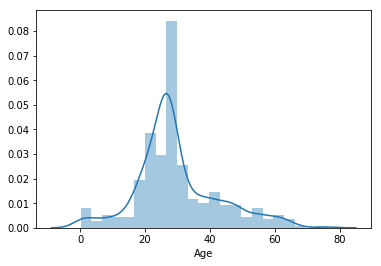

In [74]:
#test.Age.agg(["mean","median","std"])
#b=test.Age.agg(["mean","median","std"])
#print(b)
#print("---------")
#a=test["Age"].fillna(test["Age"].median())
#print(a.agg(["mean","median","std"]))

# there is no much deviation in Age variable after filling NA values with median so we are taking median for NA.
test["Age"]=test["Age"].fillna(test["Age"].median())# filling NA values with median because there is no much variation
test["Age"].astype('int64').dtypes # converting data type for visualization (float or NA values distplot will not take)
sns.distplot(test["Age"])

In [76]:
# creating One Hot Coding or Dummy variable
pcl=pd.get_dummies(test['Pclass'],drop_first=True)
sex=pd.get_dummies(test['Sex'],drop_first=True)
embark=pd.get_dummies(test['Embarked'],drop_first=True)
test=pd.concat([test,pcl,sex,embark], axis=1)

# eleminating(droping) unnecessary variables
test.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1, inplace=True)
test.head()

,PassengerId,Age,SibSp,Parch,Fare,2,3,male,Q,S,2,3,male,Q,S
0,892,34.5,0,0,7.8292,0,1,1,1,0,0,1,1,1,0
1,893,47.0,1,0,7.0000,0,1,0,0,1,0,1,0,0,1
2,894,62.0,0,0,9.6875,1,0,1,1,0,1,0,1,1,0
3,895,27.0,0,0,8.6625,0,1,1,0,1,0,1,1,0,1
4,896,22.0,1,1,12.2875,0,1,0,0,1,0,1,0,0,1
